<a href="https://colab.research.google.com/github/WillyKitheka/code-doyen/blob/main/xgBoost_implementation_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# we have run the xgboost model on the understat data and the model has scored and accuracy of 100%. 
# My take is that some columns have information that the model has learnt to use to predict hence these
# stellar results.
# In this session, these columns are removed. These are 'h_a', 'scored', 'missed', 'wins', 'draws',
# 'loses' and 'points'. 
# We shall soon find out whether there is value or not in showing the model which matches were won and 
# which ones were drawn and lost as it is training!

In [11]:
# let's import the file of interest

import pandas as pd

data_understat = pd.read_csv('/content/drive/MyDrive/xgboost_data/data_understat/complete_understat_per_game.csv')

In [12]:
data_understat

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,La_liga,2014,h,1.321070,1.141510,0.438073,1.141510,4,5,1,...,12.071429,338,28,6.300000,189,30,Malaga,0.321070,1.141510,-1.4697
1,La_liga,2014,a,1.131960,1.968630,1.131960,1.069640,4,5,0,...,15.368421,292,19,6.066667,182,30,Malaga,1.131960,-1.031370,0.7086
2,La_liga,2014,h,0.819725,0.358265,0.819725,0.358265,7,1,0,...,9.846154,128,13,8.925926,241,27,Malaga,0.819725,0.358265,0.7526
3,La_liga,2014,a,0.446347,2.761880,0.446347,2.761880,6,2,2,...,5.500000,99,18,8.000000,264,33,Malaga,-1.553653,0.761880,-0.9372
4,La_liga,2014,h,0.278657,0.646364,0.278657,0.646364,4,7,0,...,9.451613,293,31,4.571429,96,21,Malaga,0.278657,0.646364,-0.1279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40197,RFPL,2023,a,1.085150,0.659563,1.085150,0.659563,10,5,0,...,5.482759,159,29,10.294118,175,17,Fakel,1.085150,-1.340437,1.7434
40198,RFPL,2023,h,1.089200,0.499743,1.089200,0.499743,6,4,1,...,5.318182,117,22,5.384615,140,26,Fakel,0.089200,-0.500257,0.8783
40199,RFPL,2023,h,1.285580,2.388220,0.531300,0.730445,7,4,1,...,5.400000,135,25,7.933333,119,15,Fakel,0.285580,-0.611780,0.4854
40200,RFPL,2023,a,1.133150,1.465410,0.378876,1.465410,1,12,2,...,36.125000,289,8,6.500000,117,18,Fakel,-0.866850,1.465410,-1.9013


In [13]:
import pandas as pd

# Load the data
#df = pd.read_csv('your_data_file.csv')

# Check for missing values
print(data_understat.isna().sum())


league          0
year            0
h_a             0
xG              0
xGA             0
npxG            0
npxGA           0
deep            0
deep_allowed    0
scored          0
missed          0
xpts            0
result          0
date            0
wins            0
draws           0
loses           0
pts             0
npxGD           0
ppda_coef       0
ppda_att        0
ppda_def        0
oppda_coef      0
oppda_att       0
oppda_def       0
team            0
xG_diff         0
xGA_diff        0
xpts_diff       0
dtype: int64


In [14]:
import pandas as pd

# Load the data into a DataFrame
#df = pd.read_csv('your_data.csv')

# Print the data types of each column
print(data_understat.dtypes)


league           object
year              int64
h_a              object
xG              float64
xGA             float64
npxG            float64
npxGA           float64
deep              int64
deep_allowed      int64
scored            int64
missed            int64
xpts            float64
result           object
date             object
wins              int64
draws             int64
loses             int64
pts               int64
npxGD           float64
ppda_coef       float64
ppda_att          int64
ppda_def          int64
oppda_coef      float64
oppda_att         int64
oppda_def         int64
team             object
xG_diff         float64
xGA_diff        float64
xpts_diff       float64
dtype: object


In [15]:
# Print the distinct values of the 'result' column
print(data_understat['result'].unique())

['w' 'l' 'd']


In [16]:
# Print the distinct values of the 'result' column
print(data_understat['team'].unique())

['Malaga' 'Sevilla' 'Deportivo La Coruna' 'Real Sociedad' 'Espanyol'
 'Getafe' 'Atletico Madrid' 'Rayo Vallecano' 'Valencia' 'Athletic Club'
 'Barcelona' 'Real Madrid' 'Levante' 'Celta Vigo' 'Villarreal' 'Granada'
 'Eibar' 'Cordoba' 'Elche' 'Almeria' 'Las Palmas' 'Sporting Gijon'
 'Real Betis' 'Osasuna' 'Alaves' 'Leganes' 'Girona' 'Real Valladolid'
 'SD Huesca' 'Mallorca' 'Cadiz' 'Aston Villa' 'Everton' 'Southampton'
 'Leicester' 'West Bromwich Albion' 'Sunderland' 'Crystal Palace'
 'Chelsea' 'West Ham' 'Tottenham' 'Arsenal' 'Swansea' 'Stoke'
 'Newcastle United' 'Liverpool' 'Manchester City' 'Manchester United'
 'Hull' 'Burnley' 'Queens Park Rangers' 'Bournemouth' 'Norwich' 'Watford'
 'Middlesbrough' 'Huddersfield' 'Brighton' 'Cardiff' 'Fulham'
 'Wolverhampton Wanderers' 'Sheffield United' 'Leeds' 'Brentford'
 'Nottingham Forest' 'Bayern Munich' 'Hamburger SV' 'Bayer Leverkusen'
 'Hoffenheim' 'Augsburg' 'Hertha Berlin' 'Werder Bremen' 'Schalke 04'
 'Mainz 05' 'Hannover 96' 'Borussia Do

In [31]:
# Print the distinct values of the 'result' column
print(data_understat['league'].unique())

['La_liga' 'EPL' 'Bundesliga' 'Serie_A' 'Ligue_1' 'RFPL']


In [32]:
# here is where we remove the columns we mentioned above...

# Drop the 'h_a', 'scored', 'missed', 'wins', 'draws', 'loses' and 'points' columns
# from 'data_understat'

data_understat = data_understat.drop('scored', axis=1)
data_understat = data_understat.drop('missed', axis=1)
data_understat = data_understat.drop('wins', axis=1)
data_understat = data_understat.drop('draws', axis=1)
data_understat = data_understat.drop('loses', axis=1)
data_understat = data_understat.drop('pts', axis=1)
data_understat = data_understat.drop('date', axis=1)

In [33]:
data_understat.columns

Index(['league', 'year', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'xpts', 'result', 'npxGD', 'ppda_coef', 'ppda_att',
       'ppda_def', 'oppda_coef', 'oppda_att', 'oppda_def', 'team', 'xG_diff',
       'xGA_diff', 'xpts_diff'],
      dtype='object')

In [38]:
# Print the data types of each column
print(data_understat.dtypes)

league           object
year              int64
h_a              object
xG              float64
xGA             float64
npxG            float64
npxGA           float64
deep              int64
deep_allowed      int64
xpts            float64
result           object
npxGD           float64
ppda_coef       float64
ppda_att          int64
ppda_def          int64
oppda_coef      float64
oppda_att         int64
oppda_def         int64
team             object
xG_diff         float64
xGA_diff        float64
xpts_diff       float64
dtype: object


In [39]:
import pandas as pd

# implementing one-hot encoding

encoded_data_understat = pd.get_dummies(data_understat, columns=['h_a', 'league', 'team'])


In [40]:
# looking for columns with dtype; object

obj_cols = encoded_data_understat.select_dtypes(include=['object']).columns
print(obj_cols)


Index(['result'], dtype='object')


In [ ]:
# Update the format to match your date values
#encoded_data_understat['date'] = pd.to_datetime(encoded_data_understat['date'], format='%Y-%m-%d %H:%M:%S')


In [41]:
# Print the data types of each column
print(encoded_data_understat.dtypes)

year                              int64
xG                              float64
xGA                             float64
npxG                            float64
npxGA                           float64
                                 ...   
team_West Bromwich Albion         uint8
team_West Ham                     uint8
team_Wolfsburg                    uint8
team_Wolverhampton Wanderers      uint8
team_Zenit St. Petersburg         uint8
Length: 214, dtype: object


In [42]:
encoded_data_understat

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,xpts,result,npxGD,...,team_Verona,team_VfB Stuttgart,team_Villarreal,team_Watford,team_Werder Bremen,team_West Bromwich Albion,team_West Ham,team_Wolfsburg,team_Wolverhampton Wanderers,team_Zenit St. Petersburg
0,2014,1.321070,1.141510,0.438073,1.141510,4,5,1.5303,w,-0.703437,...,0,0,0,0,0,0,0,0,0,0
1,2014,1.131960,1.968630,1.131960,1.069640,4,5,0.7086,l,0.062320,...,0,0,0,0,0,0,0,0,0,0
2,2014,0.819725,0.358265,0.819725,0.358265,7,1,1.7526,d,0.461460,...,0,0,0,0,0,0,0,0,0,0
3,2014,0.446347,2.761880,0.446347,2.761880,6,2,0.0628,d,-2.315533,...,0,0,0,0,0,0,0,0,0,0
4,2014,0.278657,0.646364,0.278657,0.646364,4,7,0.8721,d,-0.367707,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40197,2023,1.085150,0.659563,1.085150,0.659563,10,5,1.7434,l,0.425587,...,0,0,0,0,0,0,0,0,0,0
40198,2023,1.089200,0.499743,1.089200,0.499743,6,4,1.8783,d,0.589457,...,0,0,0,0,0,0,0,0,0,0
40199,2023,1.285580,2.388220,0.531300,0.730445,7,4,0.4854,l,-0.199145,...,0,0,0,0,0,0,0,0,0,0
40200,2023,1.133150,1.465410,0.378876,1.465410,1,12,1.0987,w,-1.086534,...,0,0,0,0,0,0,0,0,0,0


In [43]:
from sklearn.model_selection import train_test_split

# Set aside a hold-out set of 3000 rows
X_holdout = encoded_data_understat.iloc[:3000, :-1]

In [44]:
X_holdout

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,xpts,result,npxGD,...,team_Venezia,team_Verona,team_VfB Stuttgart,team_Villarreal,team_Watford,team_Werder Bremen,team_West Bromwich Albion,team_West Ham,team_Wolfsburg,team_Wolverhampton Wanderers
0,2014,1.321070,1.141510,0.438073,1.141510,4,5,1.5303,w,-0.703437,...,0,0,0,0,0,0,0,0,0,0
1,2014,1.131960,1.968630,1.131960,1.069640,4,5,0.7086,l,0.062320,...,0,0,0,0,0,0,0,0,0,0
2,2014,0.819725,0.358265,0.819725,0.358265,7,1,1.7526,d,0.461460,...,0,0,0,0,0,0,0,0,0,0
3,2014,0.446347,2.761880,0.446347,2.761880,6,2,0.0628,d,-2.315533,...,0,0,0,0,0,0,0,0,0,0
4,2014,0.278657,0.646364,0.278657,0.646364,4,7,0.8721,d,-0.367707,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2017,1.745940,0.791146,1.745940,0.791146,4,2,2.1413,w,0.954794,...,0,0,0,0,0,0,0,0,0,0
2996,2017,0.206095,1.381870,0.206095,1.381870,2,8,0.3636,l,-1.175775,...,0,0,0,0,0,0,0,0,0,0
2997,2017,0.719922,0.978814,0.719922,0.978814,4,2,1.0779,d,-0.258892,...,0,0,0,0,0,0,0,0,0,0
2998,2017,2.023630,1.774580,2.023630,1.774580,10,2,1.5528,l,0.249050,...,0,0,0,0,0,0,0,0,0,0


In [45]:
if 'result' in X_holdout.columns:
    print("result column is present in the DataFrame")
else:
    print("result column is not present in the DataFrame")

result column is present in the DataFrame


In [46]:
# Create the target variable for the hold-out set
#y_holdout = X_holdout['result']

# Perform One-Hot Encoding on the 'result' column
X_holdout = pd.get_dummies(X_holdout, columns=['result'])

# Separate the target variable column from the feature matrix
y_holdout = X_holdout[['result_w', 'result_l', 'result_d']]
X = X_holdout.drop(['result_w', 'result_l', 'result_d'], axis=1)

# Drop the 'result' column from the hold-out set
#X_holdout = X_holdout.drop('result', axis=1)

# One-hot encode the categorical columns in the hold-out set
#X_holdout_encoded = encoder.transform(X_holdout)

# Convert the encoded features to a dataframe
#X_holdout_encoded_df = pd.DataFrame(X_holdout_encoded, columns=encoder.get_feature_names())

# Scale the encoded features in the hold-out set
#X_holdout_scaled = scaler.transform(X_holdout_encoded_df)




In [47]:
# Print the data types of each column
print(y_holdout.dtypes)

result_w    uint8
result_l    uint8
result_d    uint8
dtype: object


In [48]:
encoded_data_understat

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,xpts,result,npxGD,...,team_Verona,team_VfB Stuttgart,team_Villarreal,team_Watford,team_Werder Bremen,team_West Bromwich Albion,team_West Ham,team_Wolfsburg,team_Wolverhampton Wanderers,team_Zenit St. Petersburg
0,2014,1.321070,1.141510,0.438073,1.141510,4,5,1.5303,w,-0.703437,...,0,0,0,0,0,0,0,0,0,0
1,2014,1.131960,1.968630,1.131960,1.069640,4,5,0.7086,l,0.062320,...,0,0,0,0,0,0,0,0,0,0
2,2014,0.819725,0.358265,0.819725,0.358265,7,1,1.7526,d,0.461460,...,0,0,0,0,0,0,0,0,0,0
3,2014,0.446347,2.761880,0.446347,2.761880,6,2,0.0628,d,-2.315533,...,0,0,0,0,0,0,0,0,0,0
4,2014,0.278657,0.646364,0.278657,0.646364,4,7,0.8721,d,-0.367707,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40197,2023,1.085150,0.659563,1.085150,0.659563,10,5,1.7434,l,0.425587,...,0,0,0,0,0,0,0,0,0,0
40198,2023,1.089200,0.499743,1.089200,0.499743,6,4,1.8783,d,0.589457,...,0,0,0,0,0,0,0,0,0,0
40199,2023,1.285580,2.388220,0.531300,0.730445,7,4,0.4854,l,-0.199145,...,0,0,0,0,0,0,0,0,0,0
40200,2023,1.133150,1.465410,0.378876,1.465410,1,12,1.0987,w,-1.086534,...,0,0,0,0,0,0,0,0,0,0


In [49]:
encoded_data_understat = encoded_data_understat.iloc[3000:, :]


In [50]:
encoded_data_understat

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,xpts,result,npxGD,...,team_Verona,team_VfB Stuttgart,team_Villarreal,team_Watford,team_Werder Bremen,team_West Bromwich Albion,team_West Ham,team_Wolfsburg,team_Wolverhampton Wanderers,team_Zenit St. Petersburg
3000,2017,1.441030,2.776760,1.441030,2.033610,8,6,0.4968,l,-0.592580,...,0,0,0,0,0,0,0,0,0,0
3001,2017,1.243820,1.800960,1.243820,1.800960,6,10,0.9103,w,-0.557140,...,0,0,0,0,0,0,0,0,0,0
3002,2017,2.574960,0.847485,2.574960,0.847485,7,5,2.5569,d,1.727475,...,0,0,0,0,0,0,0,0,0,0
3003,2017,1.669540,0.325871,1.669540,0.325871,3,3,2.5639,w,1.343669,...,0,0,0,0,0,0,0,0,0,0
3004,2017,0.314128,1.724220,0.314128,1.724220,1,3,0.2538,l,-1.410092,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40197,2023,1.085150,0.659563,1.085150,0.659563,10,5,1.7434,l,0.425587,...,0,0,0,0,0,0,0,0,0,0
40198,2023,1.089200,0.499743,1.089200,0.499743,6,4,1.8783,d,0.589457,...,0,0,0,0,0,0,0,0,0,0
40199,2023,1.285580,2.388220,0.531300,0.730445,7,4,0.4854,l,-0.199145,...,0,0,0,0,0,0,0,0,0,0
40200,2023,1.133150,1.465410,0.378876,1.465410,1,12,1.0987,w,-1.086534,...,0,0,0,0,0,0,0,0,0,0


In [51]:
if 'result' in encoded_data_understat.columns:
    print("result column is present in the DataFrame")
else:
    print("result column is not present in the DataFrame")

result column is present in the DataFrame


In [ ]:
# separate the target variable column from the feature matrix
#y = encoded_data_understat['result']
#encoded_data_understat = encoded_data_understat.drop('result', axis=1)


In [52]:
import pandas as pd

# Load the data
#

#data_understat = pd.read_csv('your_data.csv')

# Perform One-Hot Encoding on the 'result' column
encoded_data_understat = pd.get_dummies(data_understat, columns=['h_a','result','league','team'])

# Separate the target variable column from the feature matrix
y = encoded_data_understat[['result_w', 'result_l', 'result_d']]
X = encoded_data_understat.drop(['result_w', 'result_l', 'result_d'], axis=1)


In [53]:
# Print the data types of each column
print(X.dtypes)

year                              int64
xG                              float64
xGA                             float64
npxG                            float64
npxGA                           float64
                                 ...   
team_West Bromwich Albion         uint8
team_West Ham                     uint8
team_Wolfsburg                    uint8
team_Wolverhampton Wanderers      uint8
team_Zenit St. Petersburg         uint8
Length: 213, dtype: object


In [54]:
# Print the data types of each column
print(y.dtypes)

result_w    uint8
result_l    uint8
result_d    uint8
dtype: object


In [55]:
y

,result_w,result_l,result_d
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
40197,0,1,0
40198,0,0,1
40199,0,1,0
40200,1,0,0


In [56]:
print(encoded_data_understat.head())


   year        xG       xGA      npxG     npxGA  deep  deep_allowed    xpts  \
0  2014  1.321070  1.141510  0.438073  1.141510     4             5  1.5303   
1  2014  1.131960  1.968630  1.131960  1.069640     4             5  0.7086   
2  2014  0.819725  0.358265  0.819725  0.358265     7             1  1.7526   
3  2014  0.446347  2.761880  0.446347  2.761880     6             2  0.0628   
4  2014  0.278657  0.646364  0.278657  0.646364     4             7  0.8721   

      npxGD  ppda_coef  ...  team_Verona  team_VfB Stuttgart  team_Villarreal  \
0 -0.703437  12.071429  ...            0                   0                0   
1  0.062320  15.368421  ...            0                   0                0   
2  0.461460   9.846154  ...            0                   0                0   
3 -2.315533   5.500000  ...            0                   0                0   
4 -0.367707   9.451613  ...            0                   0                0   

   team_Watford  team_Werder Bremen  t

In [57]:
encoded_data_understat

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,xpts,npxGD,ppda_coef,...,team_Verona,team_VfB Stuttgart,team_Villarreal,team_Watford,team_Werder Bremen,team_West Bromwich Albion,team_West Ham,team_Wolfsburg,team_Wolverhampton Wanderers,team_Zenit St. Petersburg
0,2014,1.321070,1.141510,0.438073,1.141510,4,5,1.5303,-0.703437,12.071429,...,0,0,0,0,0,0,0,0,0,0
1,2014,1.131960,1.968630,1.131960,1.069640,4,5,0.7086,0.062320,15.368421,...,0,0,0,0,0,0,0,0,0,0
2,2014,0.819725,0.358265,0.819725,0.358265,7,1,1.7526,0.461460,9.846154,...,0,0,0,0,0,0,0,0,0,0
3,2014,0.446347,2.761880,0.446347,2.761880,6,2,0.0628,-2.315533,5.500000,...,0,0,0,0,0,0,0,0,0,0
4,2014,0.278657,0.646364,0.278657,0.646364,4,7,0.8721,-0.367707,9.451613,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40197,2023,1.085150,0.659563,1.085150,0.659563,10,5,1.7434,0.425587,5.482759,...,0,0,0,0,0,0,0,0,0,0
40198,2023,1.089200,0.499743,1.089200,0.499743,6,4,1.8783,0.589457,5.318182,...,0,0,0,0,0,0,0,0,0,0
40199,2023,1.285580,2.388220,0.531300,0.730445,7,4,0.4854,-0.199145,5.400000,...,0,0,0,0,0,0,0,0,0,0
40200,2023,1.133150,1.465410,0.378876,1.465410,1,12,1.0987,-1.086534,36.125000,...,0,0,0,0,0,0,0,0,0,0


In [58]:
if 'result' in encoded_data_understat.columns:
    print("result column is present in the DataFrame")
else:
    print("result column is not present in the DataFrame")


result column is not present in the DataFrame


In [59]:
encoded_data_understat

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,xpts,npxGD,ppda_coef,...,team_Verona,team_VfB Stuttgart,team_Villarreal,team_Watford,team_Werder Bremen,team_West Bromwich Albion,team_West Ham,team_Wolfsburg,team_Wolverhampton Wanderers,team_Zenit St. Petersburg
0,2014,1.321070,1.141510,0.438073,1.141510,4,5,1.5303,-0.703437,12.071429,...,0,0,0,0,0,0,0,0,0,0
1,2014,1.131960,1.968630,1.131960,1.069640,4,5,0.7086,0.062320,15.368421,...,0,0,0,0,0,0,0,0,0,0
2,2014,0.819725,0.358265,0.819725,0.358265,7,1,1.7526,0.461460,9.846154,...,0,0,0,0,0,0,0,0,0,0
3,2014,0.446347,2.761880,0.446347,2.761880,6,2,0.0628,-2.315533,5.500000,...,0,0,0,0,0,0,0,0,0,0
4,2014,0.278657,0.646364,0.278657,0.646364,4,7,0.8721,-0.367707,9.451613,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40197,2023,1.085150,0.659563,1.085150,0.659563,10,5,1.7434,0.425587,5.482759,...,0,0,0,0,0,0,0,0,0,0
40198,2023,1.089200,0.499743,1.089200,0.499743,6,4,1.8783,0.589457,5.318182,...,0,0,0,0,0,0,0,0,0,0
40199,2023,1.285580,2.388220,0.531300,0.730445,7,4,0.4854,-0.199145,5.400000,...,0,0,0,0,0,0,0,0,0,0
40200,2023,1.133150,1.465410,0.378876,1.465410,1,12,1.0987,-1.086534,36.125000,...,0,0,0,0,0,0,0,0,0,0


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = encoded_data_understat.iloc[:, :-1]
y = encoded_data_understat.iloc[:, -1]

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the encoder to y_train and transform y_train and y_holdout
#label_encoder = LabelEncoder()
#y_train = label_encoder.fit_transform(y_train)
#y_holdout = label_encoder.transform(y_holdout)



In [61]:
from sklearn.model_selection import train_test_split

# Split the rest of the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(encoded_data_understat.iloc[3000:, :-1], encoded_data_understat.iloc[3000:, -1], test_size=0.2, random_state=42)


In [62]:
# Print the data types of each column
print(X_train.dtypes)

year                              int64
xG                              float64
xGA                             float64
npxG                            float64
npxGA                           float64
                                 ...   
team_Werder Bremen                uint8
team_West Bromwich Albion         uint8
team_West Ham                     uint8
team_Wolfsburg                    uint8
team_Wolverhampton Wanderers      uint8
Length: 215, dtype: object


In [63]:
# checking again for columns with dtype; object

obj_cols = X_train.select_dtypes(include=['object']).columns
print(obj_cols)

Index([], dtype='object')


In [64]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the parameters for the XGBoost model
params = {
    'objective': 'multi:softmax',    # Set the objective to multi-class classification
    'num_class': 3,                  # Number of classes in target variable
    'eval_metric': 'mlogloss',       # Evaluation metric
    'eta': 0.1,                      # Learning rate
    'max_depth': 6,                  # Maximum depth of tree
    'subsample': 0.8,                # Subsample ratio of the training instances
    'colsample_bytree': 0.8,         # Subsample ratio of columns when constructing each tree
    'seed': 42                       # Random seed for reproducibility
}

# Convert data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Set the number of boosting rounds and early stopping
num_rounds = 100
early_stopping_rounds = 10

# Train the XGBoost model with early stopping
xgb_model = xgb.train(params, dtrain, num_rounds, evals=[(dtest, 'eval')],
                      early_stopping_rounds=early_stopping_rounds,
                      verbose_eval=True)

# Make predictions on test set
y_pred = xgb_model.predict(dtest)

# Evaluate model performance on test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


[0]	eval-mlogloss:0.95742
[1]	eval-mlogloss:0.84036
[2]	eval-mlogloss:0.74178
[3]	eval-mlogloss:0.65775
[4]	eval-mlogloss:0.58541
[5]	eval-mlogloss:0.52282
[6]	eval-mlogloss:0.46842
[7]	eval-mlogloss:0.42070
[8]	eval-mlogloss:0.37832
[9]	eval-mlogloss:0.34117
[10]	eval-mlogloss:0.30812
[11]	eval-mlogloss:0.27872
[12]	eval-mlogloss:0.25252
[13]	eval-mlogloss:0.22938
[14]	eval-mlogloss:0.20892
[15]	eval-mlogloss:0.19026
[16]	eval-mlogloss:0.17380
[17]	eval-mlogloss:0.15877
[18]	eval-mlogloss:0.14545
[19]	eval-mlogloss:0.13328
[20]	eval-mlogloss:0.12265
[21]	eval-mlogloss:0.11274
[22]	eval-mlogloss:0.10396
[23]	eval-mlogloss:0.09615
[24]	eval-mlogloss:0.08893
[25]	eval-mlogloss:0.08235
[26]	eval-mlogloss:0.07670
[27]	eval-mlogloss:0.07139
[28]	eval-mlogloss:0.06646
[29]	eval-mlogloss:0.06207
[30]	eval-mlogloss:0.05812
[31]	eval-mlogloss:0.05446
[32]	eval-mlogloss:0.05101
[33]	eval-mlogloss:0.04795
[34]	eval-mlogloss:0.04519
[35]	eval-mlogloss:0.04265
[36]	eval-mlogloss:0.04030
[37]	eval-m

In [66]:
# Save the trained model to a file
model_path = '/content/drive/MyDrive/xgboost_data/data_understat/Multivariate-Time-Series-Forecasting-main/XGBoost_model'
xgb_model.save_model(model_path)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the parameters for the XGBoost model
params = {
    'objective': 'multi:softmax',    # Set the objective to multi-class classification
    'num_class': 3,                  # Number of classes in target variable
    'eval_metric': 'mlogloss',       # Evaluation metric
    'eta': 0.1,                      # Learning rate
    'max_depth': 6,                  # Maximum depth of tree
    'subsample': 0.8,                # Subsample ratio of the training instances
    'colsample_bytree': 0.8,         # Subsample ratio of columns when constructing each tree
    'seed': 42                       # Random seed for reproducibility
}

# Convert data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical = True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical = True)

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on test set
y_pred = xgb_model.predict(dtest)

# Evaluate model performance on test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score



# Define the parameters for the XGBoost model
params = {
    'objective': 'multi:softmax',    # Set the objective to multi-class classification
    'num_class': 3,                  # Number of classes in target variable
    'eval_metric': 'mlogloss',       # Evaluation metric
    'eta': 0.1,                      # Learning rate
    'max_depth': 6,                  # Maximum depth of tree
    'subsample': 0.8,                # Subsample ratio of the training instances
    'colsample_bytree': 0.8,         # Subsample ratio of columns when constructing each tree
    'seed': 42                       # Random seed for reproducibility
}

# Convert data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on test set
y_pred = xgb_model.predict(dtest)

# Evaluate model performance on test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [70]:
# Print the data types of each column
print(X_holdout.dtypes)

year                              int64
xG                              float64
xGA                             float64
npxG                            float64
npxGA                           float64
                                 ...   
team_Werder Bremen                uint8
team_West Bromwich Albion         uint8
team_West Ham                     uint8
team_Wolfsburg                    uint8
team_Wolverhampton Wanderers      uint8
Length: 215, dtype: object


In [71]:
# checking again for columns with dtype; object

obj_cols = X_holdout.select_dtypes(include=['object']).columns
print(obj_cols)

Index([], dtype='object')


In [72]:
if 'result' in X_holdout.columns:
    print("result column is present in the DataFrame")
else:
    print("result column is not present in the DataFrame")

result column is not present in the DataFrame


In [73]:
# Convert hold-out set to DMatrix
dholdout = xgb.DMatrix(X_holdout)

# Make predictions on the hold-out set
y_pred_holdout = xgb_model.predict(dholdout)

# Calculate the accuracy score of the predictions
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)

print("Accuracy on hold-out set: {:.2f}".format(accuracy_holdout))


Accuracy on hold-out set: 1.00


In [75]:
# Print the predicted values
print("Predicted values on hold-out set: ", y_pred_holdout)

Predicted values on hold-out set:  [0. 0. 0. ... 0. 0. 0.]


In [74]:
y_pred_holdout

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [76]:
# Print predicted and actual labels
for y_pred, y_actual in zip(y_pred_holdout, y_holdout):
    print("Predicted: {}, Actual: {}".format(y_pred, y_actual))


Streaming output truncated to the last 5000 lines.
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 0.

In [77]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# Define the parameters for the XGBoost model
params = {
    'objective': 'multi:softmax',    # Set the objective to multi-class classification
    'num_class': 3,                  # Number of classes in target variable
    'eval_metric': 'mlogloss',       # Evaluation metric
    'eta': 0.1,                      # Learning rate
    'max_depth': 6,                  # Maximum depth of tree
    'subsample': 0.8,                # Subsample ratio of the training instances
    'colsample_bytree': 0.8,         # Subsample ratio of columns when constructing each tree
    'seed': 42                       # Random seed for reproducibility
}

# Convert data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on test set
y_pred = xgb_model.predict(dtest)

# Convert predicted probabilities to class labels
y_pred = y_pred.round().astype(int)

# Evaluate model performance on test set
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 1.00
ROC-AUC: 0.71
Precision: 1.00
Recall: 1.00
F1-score: 0.99


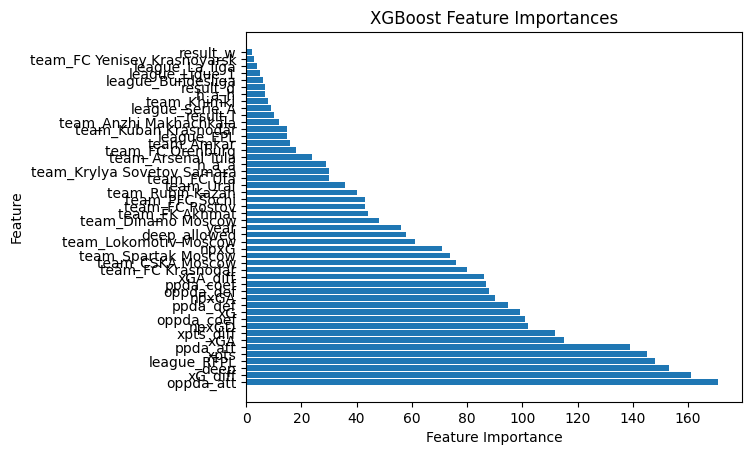

In [78]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_rounds)

# Extract feature importances
importances = xgb_model.get_score(importance_type='weight') # 'weight', 'gain', or 'cover'

# Convert the dictionary of importances to a list of tuples
importances_list = [(feat, importance) for feat, importance in importances.items()]

# Sort the importances in descending order
importances_list = sorted(importances_list, key=lambda x: x[1], reverse=True)

# Extract feature names and importances as separate lists
feature_names = [x[0] for x in importances_list]
importance_values = [x[1] for x in importances_list]

# Plot feature importances
plt.barh(range(len(importance_values)), importance_values)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances')
plt.show()


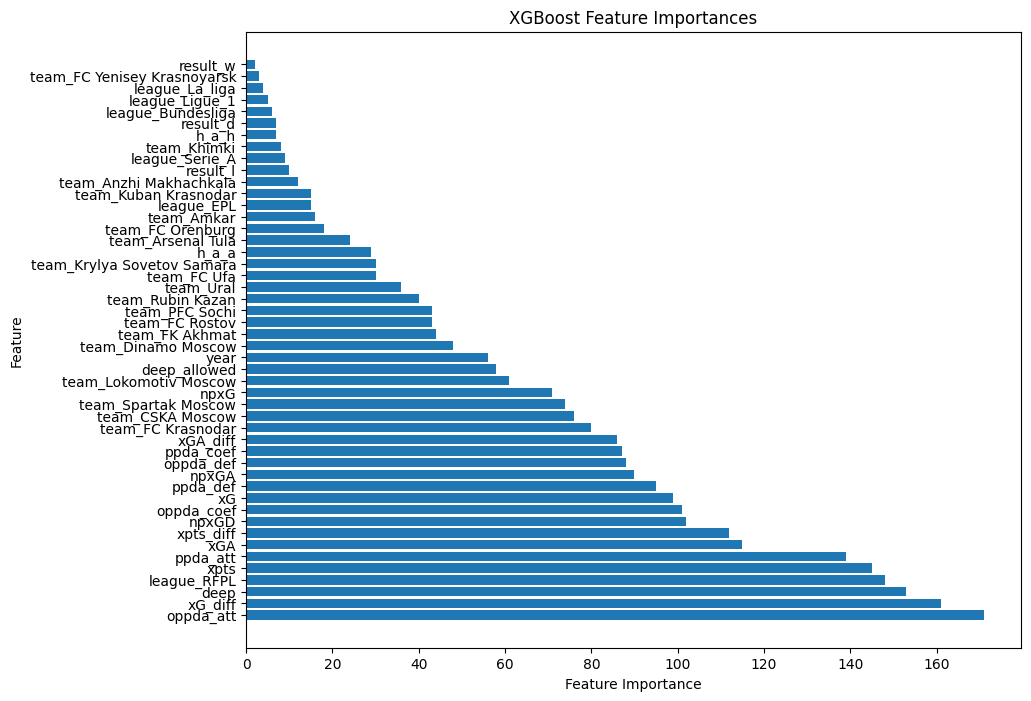

In [79]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_rounds)

# Extract feature importances
importances = xgb_model.get_score(importance_type='weight') # 'weight', 'gain', or 'cover'

# Convert the dictionary of importances to a list of tuples
importances_list = [(feat, importance) for feat, importance in importances.items()]

# Sort the importances in descending order
importances_list = sorted(importances_list, key=lambda x: x[1], reverse=True)

# Extract feature names and importances as separate lists
feature_names = [x[0] for x in importances_list]
importance_values = [x[1] for x in importances_list]

# Set the figure size
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

# Plot feature importances
plt.barh(range(len(importance_values)), importance_values)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances')
plt.show()


In [ ]:
# Restart runtime after running this!
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Perform One-Hot Encoding on the 'result' column
df_pycaret = pd.get_dummies(data_understat, columns=['h_a','result','league','team'])

In [ ]:
# checking again for columns with dtype; object

obj_cols = df_pycaret.select_dtypes(include=['object']).columns
print(obj_cols)

Index([], dtype='object')


In [ ]:
df_pycaret.dtypes

year                              int64
xG                              float64
xGA                             float64
npxG                            float64
npxGA                           float64
                                 ...   
team_West Bromwich Albion         uint8
team_West Ham                     uint8
team_Wolfsburg                    uint8
team_Wolverhampton Wanderers      uint8
team_Zenit St. Petersburg         uint8
Length: 216, dtype: object

In [ ]:
from pycaret.classification import *

s = setup(data_understat, target='result')

,Description,Value
0,Session id,5864
1,Target,result
2,Target type,Multiclass
3,Target mapping,"d: 0, l: 1, w: 2"
4,Original data shape,"(39422, 22)"
5,Transformed data shape,"(39422, 27)"
6,Transformed train set shape,"(27595, 27)"
7,Transformed test set shape,"(11827, 27)"
8,Ordinal features,1
9,Numeric features,18


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.6660
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2740
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,0.9999,0.9999,19.2840
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,0.9999,0.9999,1.5370
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,0.9999,0.9999,4.6070
lightgbm,Light Gradient Boosting Machine,0.9999,1.0000,0.9999,0.9999,0.9999,0.9998,0.9998,1.5710
dt,Decision Tree Classifier,0.9998,0.9998,0.9998,0.9998,0.9998,0.9997,0.9997,0.3420
lr,Logistic Regression,0.9969,1.0000,0.9969,0.9969,0.9969,0.9953,0.9953,4.2270
lda,Linear Discriminant Analysis,0.9848,0.9993,0.9848,0.9851,0.9849,0.9769,0.9770,0.3220
ridge,Ridge Classifier,0.8437,0.0000,0.8437,0.8892,0.8222,0.7549,0.7868,0.3200


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
data_understat.columns

Index(['league', 'year', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'xpts', 'result', 'npxGD', 'ppda_coef', 'ppda_att',
       'ppda_def', 'oppda_coef', 'oppda_att', 'oppda_def', 'team', 'xG_diff',
       'xGA_diff', 'xpts_diff'],
      dtype='object')

In [ ]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=5864, verbose=0, warm_start=False)


In [ ]:
finalize_model(best)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['year', 'xG', 'xGA', 'npxG',
                                             'npxGA', 'deep', 'deep_allowed',
                                             'xpts', 'npxGD', 'ppda_coef',
                                             'ppda_att', 'ppda_def',
                                             'oppda_coef', 'oppda_att',...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=5864,
                                        verbose=0, warm_start=False))],
         verbose=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

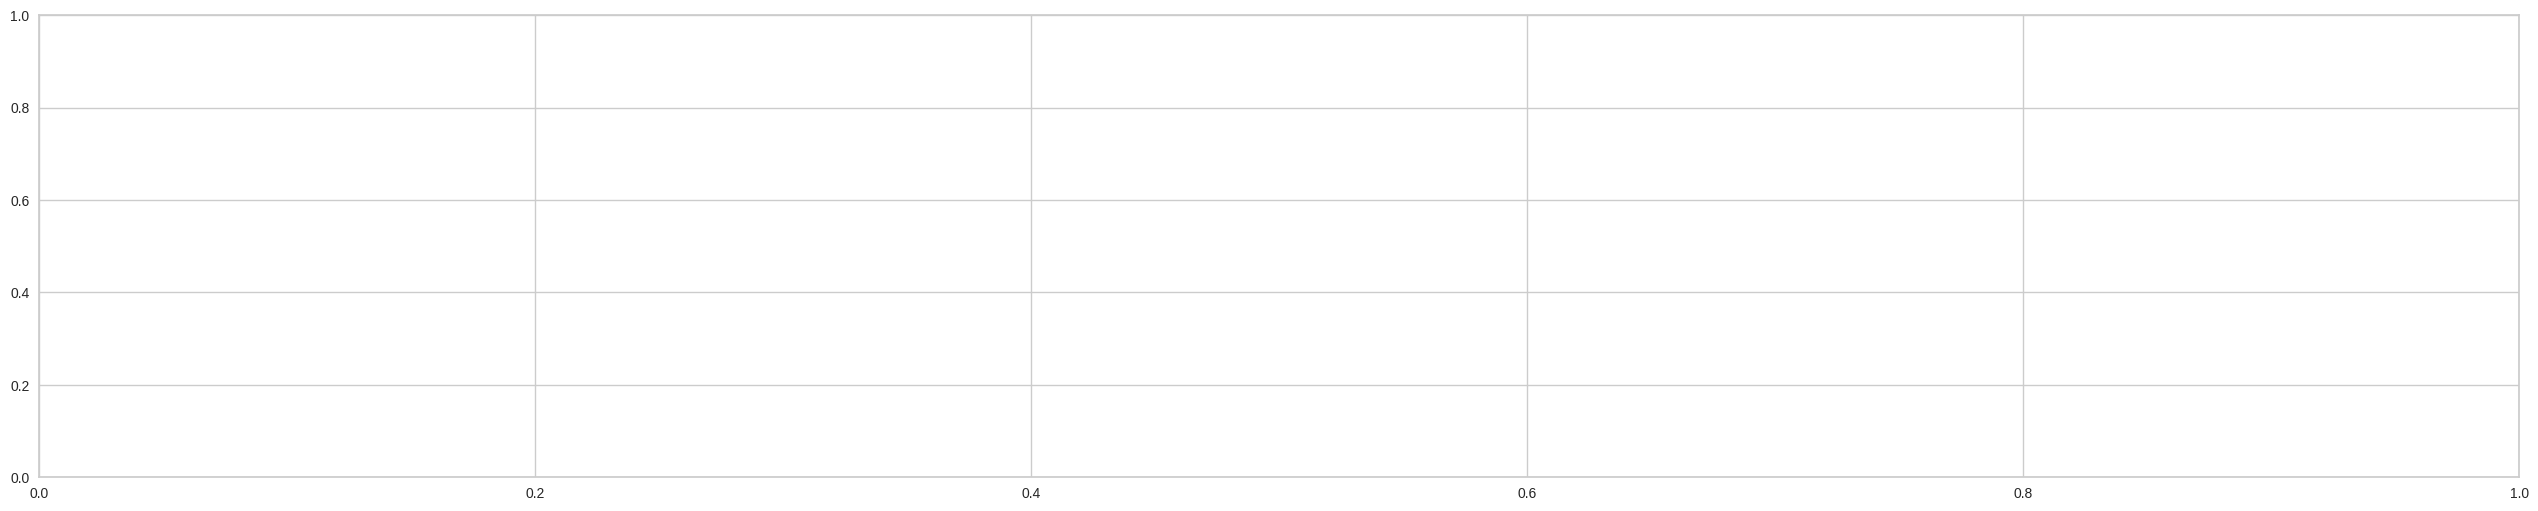

In [ ]:
evaluate_model(best)

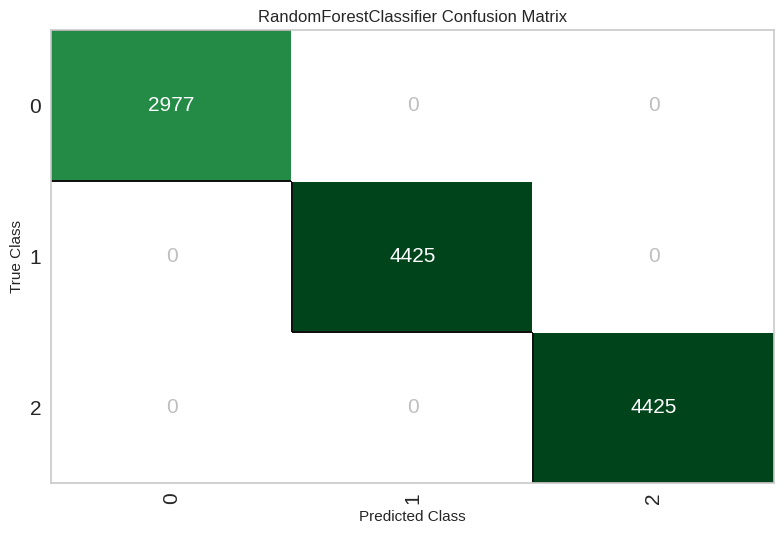

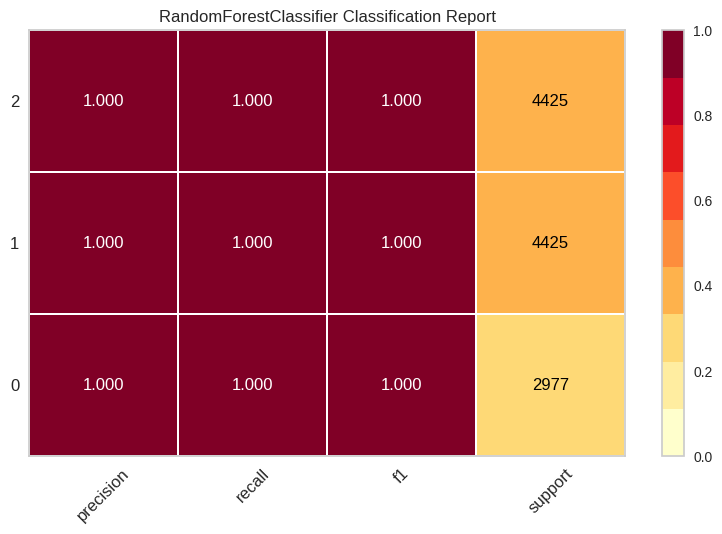

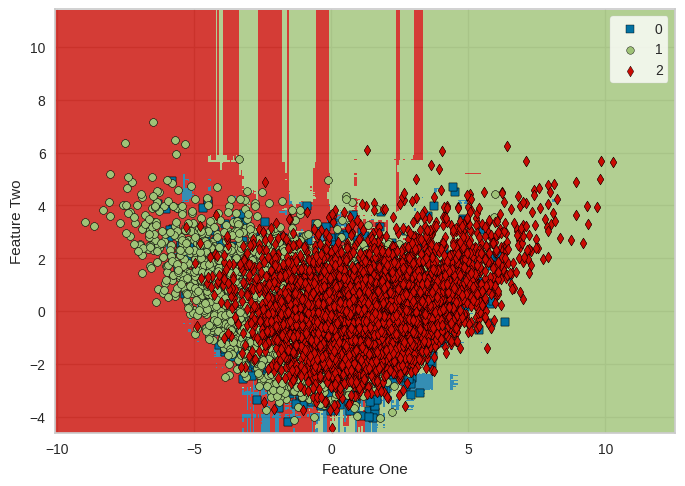

In [ ]:
# Assuming 'best' is the best trained model from PyCaret

# Plot confusion matrix
plot_model(best, plot='confusion_matrix')

# Plot classification report
plot_model(best, plot='class_report')

# Plot decision boundary
plot_model(best, plot='boundary')


In [ ]:
!pip install --upgrade pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install ipython


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.classification import *

# Assume you have already setup and trained your experiment
# and 'best' is the best trained model from PyCaret

# Save the best model
save_model(best, model_name='best_understat_data_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['year', 'xG', 'xGA', 'npxG',
                                              'npxGA', 'deep', 'deep_allowed',
                                              'xpts', 'npxGD', 'ppda_coef',
                                              'ppda_att', 'ppda_def',
                                              'oppda_coef', 'oppda_att',...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_nodes=None, max

In [4]:
# we did the multivariate time series analysis and obtained a mean of all the variables of interest. This mean comes out of 5-step prediction of the VAR model
#we pull in the file, transform it so that it is similar in structure to the train/test data sets that the XGBoost and Pycaret models were trained with.

import pandas as pd

all_rmse_df = pd.read_csv('/content/drive/MyDrive/xgboost_data/data_understat/Multivariate-Time-Series-Forecasting-main/all_rmse_df.csv', index_col = 'index')

In [5]:
all_rmse_df

,team,xG,xGA,npxG,npxGA,deep,deep_allowed,xpts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,xG_diff,xGA_diff,xpts_diff
index,,,,,,,,,,,,,,,,,,
0,arsenal,0.887894,0.863261,0.867181,0.777992,6.154875,3.896049,0.884422,1.378176,3.431064,77.219202,4.236388,4.686485,64.428229,5.748405,0.848525,1.148567,0.872131
1,new_castle_data,1.374423,0.803917,1.344151,0.806758,6.704521,3.823552,1.128955,1.857702,8.210364,98.851695,6.771394,5.626491,59.463510,6.074885,1.312993,0.629300,0.942967
2,milan_data,0.814458,0.607894,0.852153,0.529589,3.907279,3.414368,0.781231,1.117662,3.933063,78.477035,6.677239,5.383112,77.660697,5.659391,1.105857,0.824399,1.095497
3,lazio_data,0.922825,0.731049,0.678157,0.746803,2.747899,3.092967,0.876941,1.127007,7.341513,99.439192,7.443231,4.932573,73.033546,5.422623,0.838169,0.923455,1.158790
4,hoffenheim_data,0.997033,0.829408,0.787104,0.824938,2.966948,4.675736,0.915063,1.291845,3.609980,66.035827,6.815713,5.629994,75.713677,7.539558,0.649404,1.064208,0.905843
5,eintracht_f_data,1.042049,0.862508,0.861495,0.832279,4.004676,3.925451,0.811656,1.292448,5.976432,91.255998,8.154798,8.125587,68.542195,6.419616,0.969174,1.052852,1.061001
6,augsburg_data,0.675197,0.985877,0.553867,0.958328,2.849718,4.090684,0.665471,1.046712,4.163266,77.752755,6.099610,2.608930,63.804099,6.697499,0.930024,1.158341,1.161973
7,union_berlin_data,0.588603,0.997881,0.574081,0.964167,2.865780,4.704213,0.691222,1.179564,10.123423,85.399096,6.207751,4.393283,50.839093,5.077853,0.688364,1.020125,1.079804
8,hertha_data,0.740429,0.898543,0.692780,0.886033,2.372711,4.023737,0.796935,1.278372,6.384490,86.859184,6.619707,3.665602,76.942493,4.839767,0.684642,1.157261,0.797109


In [6]:
print(all_rmse_df.shape)

(30, 18)


In [7]:
all_rmse_df.columns

Index(['team', 'xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed', 'xpts',
       'npxGD', 'ppda_coef', 'ppda_att', 'ppda_def', 'oppda_coef', 'oppda_att',
       'oppda_def', 'xG_diff', 'xGA_diff', 'xpts_diff'],
      dtype='object')

In [1]:
def remove_suffix(s):
    return s.replace('_data', '')


In [8]:
all_rmse_df['team'] = all_rmse_df['team'].apply(remove_suffix)


In [9]:
all_rmse_df

,team,xG,xGA,npxG,npxGA,deep,deep_allowed,xpts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,xG_diff,xGA_diff,xpts_diff
index,,,,,,,,,,,,,,,,,,
0,arsenal,0.887894,0.863261,0.867181,0.777992,6.154875,3.896049,0.884422,1.378176,3.431064,77.219202,4.236388,4.686485,64.428229,5.748405,0.848525,1.148567,0.872131
1,new_castle,1.374423,0.803917,1.344151,0.806758,6.704521,3.823552,1.128955,1.857702,8.210364,98.851695,6.771394,5.626491,59.463510,6.074885,1.312993,0.629300,0.942967
2,milan,0.814458,0.607894,0.852153,0.529589,3.907279,3.414368,0.781231,1.117662,3.933063,78.477035,6.677239,5.383112,77.660697,5.659391,1.105857,0.824399,1.095497
3,lazio,0.922825,0.731049,0.678157,0.746803,2.747899,3.092967,0.876941,1.127007,7.341513,99.439192,7.443231,4.932573,73.033546,5.422623,0.838169,0.923455,1.158790
4,hoffenheim,0.997033,0.829408,0.787104,0.824938,2.966948,4.675736,0.915063,1.291845,3.609980,66.035827,6.815713,5.629994,75.713677,7.539558,0.649404,1.064208,0.905843
5,eintracht_f,1.042049,0.862508,0.861495,0.832279,4.004676,3.925451,0.811656,1.292448,5.976432,91.255998,8.154798,8.125587,68.542195,6.419616,0.969174,1.052852,1.061001
6,augsburg,0.675197,0.985877,0.553867,0.958328,2.849718,4.090684,0.665471,1.046712,4.163266,77.752755,6.099610,2.608930,63.804099,6.697499,0.930024,1.158341,1.161973
7,union_berlin,0.588603,0.997881,0.574081,0.964167,2.865780,4.704213,0.691222,1.179564,10.123423,85.399096,6.207751,4.393283,50.839093,5.077853,0.688364,1.020125,1.079804
8,hertha,0.740429,0.898543,0.692780,0.886033,2.372711,4.023737,0.796935,1.278372,6.384490,86.859184,6.619707,3.665602,76.942493,4.839767,0.684642,1.157261,0.797109


In [24]:
clean_team_names = ['Arsenal', 'Newcastle United', 'AC Milan', 'Lazio', 'Hoffenheim', 'Eintracht Frankfurt', 'Augsburg', 'Union Berlin', 'Hertha Berlin',                    'VfB Stuttgart', 'Wolverhampton Wanderers', 'Aston Villa', 'Nice', 'Rennes', 'Roma', 'Inter', 'Reims', 'Lille', 'Cremonese', 'Spezia',                    'Lens', 'Marseille', 'Atalanta', 'Juventus', 'Nantes', 'Strasbourg', 'West Ham', 'Manchester United', 'Lecce', 'Verona']

all_rmse_df['team'] = all_rmse_df['team'].apply(lambda x: x.replace('_data', '') if x.replace('_data', '') in clean_team_names else x)
all_rmse_df['team'] = all_rmse_df['team'].apply(lambda x: x.title())


In [22]:
clean_team_names = ['Arsenal', 'Newcastle United', 'AC Milan', 'Lazio', 'Hoffenheim', 'Eintracht Frankfurt', 'Augsburg', 'Union Berlin', 'Hertha Berlin',
                    'VfB Stuttgart', 'Wolverhampton Wanderers', 'Aston Villa', 'Nice', 'Rennes', 'Roma', 'Inter', 'Reims', 'Lille', 'Cremonese', 'Spezia',
                    'Lens', 'Marseille', 'Atalanta', 'Juventus', 'Nantes', 'Strasbourg', 'West Ham', 'Manchester United', 'Lecce', 'Verona']

all_rmse_df['team'] = all_rmse_df['team'].apply(lambda x: x.replace('_data', '').title() if x in clean_team_names else x)


In [26]:
clean_team_names = {
    'arsenal': 'Arsenal',
    'New_Castle': 'Newcastle United',
    'Milan': 'AC Milan',
    'Lazio': 'Lazio',
    'Hoffenheim': 'Hoffenheim',
    'Eintracht_F': 'Eintracht Frankfurt',
    'Augsburg': 'Augsburg',
    'Union_Berlin': 'Union Berlin',
    'Hertha': 'Hertha Berlin',
    'Stuttgart': 'VfB Stuttgart',
    'Wolves': 'Wolverhampton Wanderers',
    'Aston_Villa': 'Aston Villa',
    'Nice': 'Nice',
    'Rennes': 'Rennes',
    'Roma': 'AS Roma',
    'Inter': 'Inter',
    'Reims': 'Reims',
    'Lille': 'Lille',
    'Cremonese': 'Cremonese',
    'Spezia': 'Spezia',
    'Lens': 'Lens',
    'Marseille': 'Marseille',
    'Atalanta': 'Atalanta',
    'Juventus': 'Juventus',
    'Nantes': 'Nantes',
    'Strasbourg': 'Strasbourg',
    'West_Ham': 'West Ham United',
    'Man_Utd': 'Manchester United',
    'Lecce': 'Lecce',
    'Verona': 'Hellas Verona'
}

all_rmse_df['team'] = all_rmse_df['team'].apply(lambda x: clean_team_names[x] if x in clean_team_names else x)


In [28]:
clean_team_names = {
    'Hellas_Verona': 'Hellas Verona'
}

all_rmse_df['team'] = all_rmse_df['team'].apply(lambda x: clean_team_names[x] if x in clean_team_names else x)

In [29]:
all_rmse_df

,team,xG,xGA,npxG,npxGA,deep,deep_allowed,xpts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,xG_diff,xGA_diff,xpts_diff
index,,,,,,,,,,,,,,,,,,
0,Arsenal,0.887894,0.863261,0.867181,0.777992,6.154875,3.896049,0.884422,1.378176,3.431064,77.219202,4.236388,4.686485,64.428229,5.748405,0.848525,1.148567,0.872131
1,Newcastle United,1.374423,0.803917,1.344151,0.806758,6.704521,3.823552,1.128955,1.857702,8.210364,98.851695,6.771394,5.626491,59.463510,6.074885,1.312993,0.629300,0.942967
2,AC Milan,0.814458,0.607894,0.852153,0.529589,3.907279,3.414368,0.781231,1.117662,3.933063,78.477035,6.677239,5.383112,77.660697,5.659391,1.105857,0.824399,1.095497
3,Lazio,0.922825,0.731049,0.678157,0.746803,2.747899,3.092967,0.876941,1.127007,7.341513,99.439192,7.443231,4.932573,73.033546,5.422623,0.838169,0.923455,1.158790
4,Hoffenheim,0.997033,0.829408,0.787104,0.824938,2.966948,4.675736,0.915063,1.291845,3.609980,66.035827,6.815713,5.629994,75.713677,7.539558,0.649404,1.064208,0.905843
5,Eintracht Frankfurt,1.042049,0.862508,0.861495,0.832279,4.004676,3.925451,0.811656,1.292448,5.976432,91.255998,8.154798,8.125587,68.542195,6.419616,0.969174,1.052852,1.061001
6,Augsburg,0.675197,0.985877,0.553867,0.958328,2.849718,4.090684,0.665471,1.046712,4.163266,77.752755,6.099610,2.608930,63.804099,6.697499,0.930024,1.158341,1.161973
7,Union Berlin,0.588603,0.997881,0.574081,0.964167,2.865780,4.704213,0.691222,1.179564,10.123423,85.399096,6.207751,4.393283,50.839093,5.077853,0.688364,1.020125,1.079804
8,Hertha Berlin,0.740429,0.898543,0.692780,0.886033,2.372711,4.023737,0.796935,1.278372,6.384490,86.859184,6.619707,3.665602,76.942493,4.839767,0.684642,1.157261,0.797109


In [34]:
all_rmse_df.columns

Index(['team', 'xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed', 'xpts',
       'npxGD', 'ppda_coef', 'ppda_att', 'ppda_def', 'oppda_coef', 'oppda_att',
       'oppda_def', 'xG_diff', 'xGA_diff', 'xpts_diff'],
      dtype='object')

In [35]:
# Create a new dataframe containing the columns to be added
new_cols_df = pd.DataFrame({'league': ['EPL', 'EPL', 'Serie_A', 'Serie_A', 'Bundesliga', 'Bundesliga', 'Bundesliga', 'Bundesliga', 'Bundesliga',
                                       'Bundesliga', 'EPL', 'EPL', 'Ligue_1', 'Ligue_1', 'Serie_A', 'Serie_A', 'Ligue_1', 'Ligue_1', 'Serie_A', 'Serie_A',
                                       'Ligue_1', 'Ligue_1', 'Serie_A', 'Serie_A', 'Ligue_1', 'Ligue_1', 'EPL', 'EPL', 'Serie_A', 'Serie_A'],
                            'year': [2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
                                     2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,],
                            'h_a': ['h', 'a', 'h', 'a', 'h', 'a', 'h', 'a', 'h', 'a', 'h', 'a', 'h', 'a', 'h', 'a', 'h', 'a', 'h', 'a', 'h', 'a', 'h', 'a',
                                    'h', 'a', 'h', 'a',  'h', 'a']})

# Concatenate the two dataframes along the columns axis
all_rmse_df = pd.concat([new_cols_df, all_rmse_df], axis=1)


In [36]:
all_rmse_df

,league,year,h_a,team,xG,xGA,npxG,npxGA,deep,deep_allowed,...,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,xG_diff,xGA_diff,xpts_diff
0,EPL,2023,h,Arsenal,0.887894,0.863261,0.867181,0.777992,6.154875,3.896049,...,1.378176,3.431064,77.219202,4.236388,4.686485,64.428229,5.748405,0.848525,1.148567,0.872131
1,EPL,2023,a,Newcastle United,1.374423,0.803917,1.344151,0.806758,6.704521,3.823552,...,1.857702,8.210364,98.851695,6.771394,5.626491,59.463510,6.074885,1.312993,0.629300,0.942967
2,Serie_A,2023,h,AC Milan,0.814458,0.607894,0.852153,0.529589,3.907279,3.414368,...,1.117662,3.933063,78.477035,6.677239,5.383112,77.660697,5.659391,1.105857,0.824399,1.095497
3,Serie_A,2023,a,Lazio,0.922825,0.731049,0.678157,0.746803,2.747899,3.092967,...,1.127007,7.341513,99.439192,7.443231,4.932573,73.033546,5.422623,0.838169,0.923455,1.158790
4,Bundesliga,2023,h,Hoffenheim,0.997033,0.829408,0.787104,0.824938,2.966948,4.675736,...,1.291845,3.609980,66.035827,6.815713,5.629994,75.713677,7.539558,0.649404,1.064208,0.905843
5,Bundesliga,2023,a,Eintracht Frankfurt,1.042049,0.862508,0.861495,0.832279,4.004676,3.925451,...,1.292448,5.976432,91.255998,8.154798,8.125587,68.542195,6.419616,0.969174,1.052852,1.061001
6,Bundesliga,2023,h,Augsburg,0.675197,0.985877,0.553867,0.958328,2.849718,4.090684,...,1.046712,4.163266,77.752755,6.099610,2.608930,63.804099,6.697499,0.930024,1.158341,1.161973
7,Bundesliga,2023,a,Union Berlin,0.588603,0.997881,0.574081,0.964167,2.865780,4.704213,...,1.179564,10.123423,85.399096,6.207751,4.393283,50.839093,5.077853,0.688364,1.020125,1.079804
8,Bundesliga,2023,h,Hertha Berlin,0.740429,0.898543,0.692780,0.886033,2.372711,4.023737,...,1.278372,6.384490,86.859184,6.619707,3.665602,76.942493,4.839767,0.684642,1.157261,0.797109
9,Bundesliga,2023,a,VfB Stuttgart,0.764875,0.640229,0.724117,0.662848,3.164488,3.894840,...,1.108246,7.771641,81.691427,7.895404,5.837555,67.133579,6.400722,0.983209,0.865793,1.036627


In [67]:
# and now to encode the 'all_rmse_df'
# Perform One-Hot Encoding on the 'result' column
encoded_all_rmse_df = pd.get_dummies(all_rmse_df, columns=['h_a','league','team'])


In [68]:
# Convert hold-out set to DMatrix
d_all_rmse_df = xgb.DMatrix(encoded_all_rmse_df)

# Make predictions on the hold-out set
all_rmse_df_pred = xgb_model.predict(d_all_rmse_df)

# Calculate the accuracy score of the predictions
#accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)

print("Accuracy on all_rmse_df set: {:.2f}".format(all_rmse_df_pred))

ValueError: ignored

In [69]:

# Convert the new dataset into a DMatrix object
dnew = xgb.DMatrix(encoded_all_rmse_df)

# Make predictions on the new dataset using the trained model
predictions = xgb_model.predict(dnew)

# Print the predicted values
print(predictions)


ValueError: ignored

In [37]:
all_rmse_df.to_csv('/content/drive/MyDrive/xgboost_data/data_understat/Multivariate-Time-Series-Forecasting-main/all_rmse_df.csv')